In [1]:
from gbdxtools.ipe_image import IpeImage
from gbdxtools import Interface
gbdx = Interface()

In [2]:
# Provide virtual access to the full Idaho Image 

img = IpeImage('45784ada-cf81-4bbd-b4bd-d95c7a3bb7bb')
rgb = img[[4,2,1], ...]
rgb.shape

(3, 7168, 12032)

In [3]:
# subset the image by an AOI
aoi = img.aoi([-105.26801347732545,40.00817393602954,-105.26406526565553,40.01108296862613])

In [4]:
sm_rgb = aoi[[4,2,1], ...]
sm_rgb.shape

(3, 768, 768)

In [5]:
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

def plot_pan(data):
    f, ax1 = plt.subplots(1, figsize=(20,10))
    ax1.axis('off')
    plt.imshow(data[0,:,:], cmap="Greys_r")
    plt.show()

def plot(data, stretch=[2,98]):
    f, ax1 = plt.subplots(1, figsize=(20,10))
    ax1.axis('off')
    data = np.rollaxis(data, 0, 3)
    lims = np.percentile(data,stretch,axis=(0,1))
    for x in xrange(len(data[0,0,:])):
        top = lims[:,x][1]
        bottom = lims[:,x][0]
        data[:,:,x] = (data[:,:,x]-bottom)/float(top-bottom)
    data = np.clip(data,0,1)
    plt.imshow(data,interpolation='nearest')   
    plt.show(block=False)

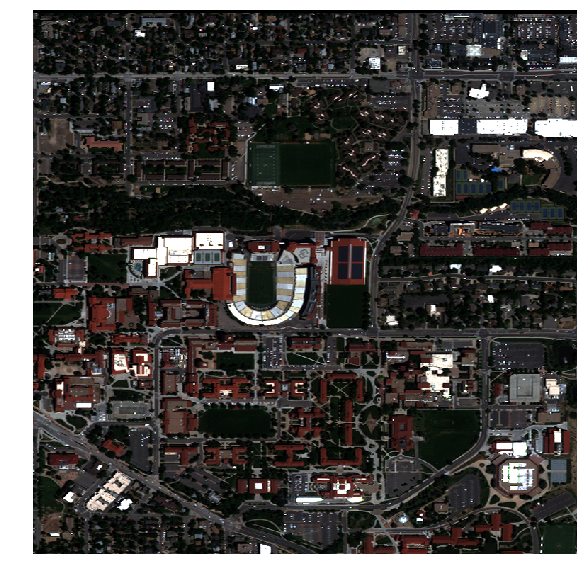

In [6]:
# shouldnt have to call compute here 
plot(sm_rgb.compute())

In [9]:
cat_id = '1030010059784E00'
bounds = [-105.26801347732545,40.00817393602954,-105.26406526565553,40.01108296862613]

img = gbdx.image(cat_id)

aoi = img.aoi(bounds, image_type='PAN')
print aoi.shape

(1, 1024, 1280)


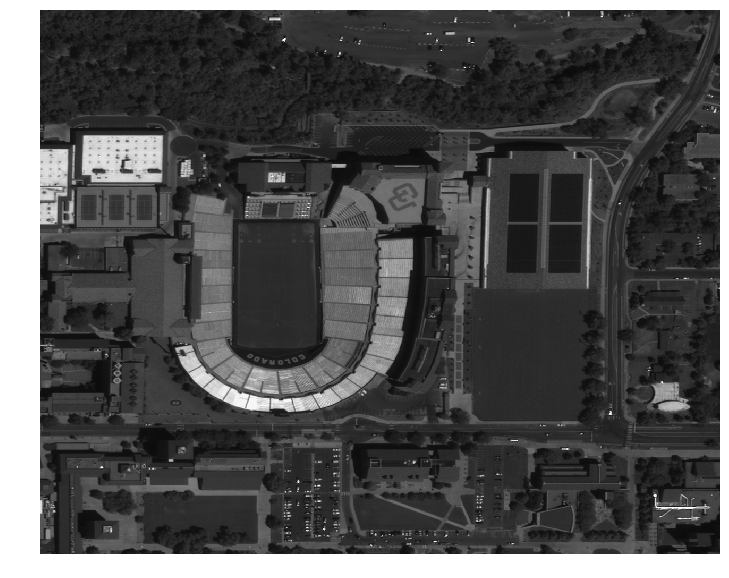

In [10]:
plot_pan(aoi)